In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {font-size: 100%; width:90% !important; }</style>"))

# GTI771 - Apprentissage machine avancé
## Département du génie logiciel et des technologies de l’information



## Laboratoire 1 - Analyse et préparation des données et extraction de primitives

#### <font color=white> Version 4.0 mai 2020 </font>
#### <font color=black> Version 5.0 janvier 2021 </font>

##### Prof. Alessandro L. Koerich

| Étudiants             | NOMS - CODE PERMANENT                                   |
|-----------------------|---------------------------------------------------------|
| Session               | SAISON ANNÉE                                            |
| Équipe                | X                                                       |
| Numéro du laboratoire | X                                                       |
| Professeur            | Prof. NOM                                               |
| Chargé de laboratoire | NOM                                                     |
| Date                  | DATE                                                    |

## Introduction

Ce premier laboratoire porte sur la définition et l’extraction de primitives sur des visages. Le problème de classification qui vous est présenté est le problème [Facial Expression Recognition (FER)](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data), dont le but est de classer des visages dans sept catégories. En vous basant sur les concepts vus en classe, vous devez définir des primitives que vous jugez pertinentes à extraire sur ces types d’images et effectuer l’extraction de celles-ci sur l’ensemble de données fournies avec cet énoncé.

Veuillez noter que les images qui vous sont fournies ne sont pas nécessairement très faciles à travailler. Plusieurs images comportent du bruit, des artéfacts ou des éléments non pertinents. Le défi de ce laboratoire repose sur cette difficulté qui est chose courante dans des problèmes d’apprentissage machine moderne.

Voici, en exemple, des images de visages se retrouvant dans l’ensemble de données:

![Exemples de FER](https://miro.medium.com/max/2420/1*nXqJ4lMiBRp4Ilm3bpRxuA.png)


L’évaluation de ce laboratoire sera basée sur la qualité des primitives proposées, les réponses aux questions dans cette notebook ainsi que l'organisation de votre code source <font color=black> (SVP, n'oubliez pas de mettre des commentaires dans le code!)</font>. Le pouvoir discriminant, c’est-à-dire la capacité des primitives à bien séparer les exemples des classes dans l’espace des primitives, sera également évalué.

# Partie 1: Imports

### 1a: Import de bibliotèques

### À faire:
1. Ajouter toutes les bibliothèques que vous avez utilisées pour compléter ce notebook dans une cellule avec une petite description.

In [1]:
import numpy as np  # package for scientific computing with Python.
import matplotlib.pyplot as plt # 2D plotting library
import pandas as pd # Pour la visualisation de matrice
from sklearn.preprocessing import MinMaxScaler #Pour la normalisation des images 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.metrics import classification_report

import cv2
print('hello')
# Votre code ici

hello


#### Fonctions

In [3]:
def fa():
    return 1

## Partie 2: Analyse exploratoire des données

On va commencer en regardant les données.

Pour ce lab, nous allons utiliser le dataset FER.

Le dataset est disponible dans https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data, et il continent presque 35,000 visages.

## 2a: Charger le fichier de données

In [5]:
109.065458# load data
ferData = np.loadtxt( 'C:/Users/massy/Dev/GTI771-Lab1/data/fer2013.csv', delimiter=',', dtype=np.str )
 
# Training set
Xtrain = np.ones( (28709,2304), float )

for i in range( 1, 28710 ):
    Xtrain[i-1] = ferData[i,1].split(" ")

ytrain = ferData[1:28710,0].astype( np.int )

# Validation set
Xval = np.ones( (3589,2304), float )

for i in range( 28710, 32299 ):
    Xval[i-28710] = ferData[i,1].split(" ")

yval = ferData[28710:32299,0].astype( np.int )

# Test set
Xtest = np.ones( (3589,2304), float )

for i in range( 32299, 35888 ):
    Xtest[i-32299] = ferData[i,1].split(" ")

ytest = ferData[32299:,0].astype( np.int )

print(Xtrain.shape, Xval.shape, Xtest.shape)
print(Xtrain[1])

(28709, 2304) (3589, 2304) (3589, 2304)
[151. 150. 147. ... 193. 183. 184.]


In [6]:
print(yval)

[0 1 4 ... 4 4 4]


In [7]:
# reshape to be [samples][channels][width][height]
Xtrain = Xtrain.reshape( Xtrain.shape[0], 1, 48, 48 ).astype('uint8')
Xtest  = Xtest.reshape( Xtest.shape[0], 1, 48, 48 ).astype('uint8')
Xval   = Xval.reshape( Xval.shape[0], 1, 48, 48 ).astype('uint8')

print( Xtrain.shape, Xval.shape, Xtest.shape )


(28709, 1, 48, 48) (3589, 1, 48, 48) (3589, 1, 48, 48)


## <font color=black> 2b: Pre-traitement et visualisation des visages </font>

Vous pouvez visualiser les images en utilisant `plt.imshow`.

Il y a différents types de prétraitement que nous pouvons appliquer à des images dans les ensembles de données pour réduire la variabilité, réduire des bruits, etc.

### À faire:
1. Pensez-vous qu’est nécessaire un prétraitement des images? Si oui, vous pouvez choisir différents algorithmes de prétraitement dans [scikit-image](https://scikit-image.org/docs/stable/api/api.html). Il y a aussi autres types de prétraitement plus généraux dans [scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing).
2. Expliquer et justifier les prétraitements choisis.

#### Code

In [89]:
# Votre code de pre-processing

labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions = [0,1,2,3,4,5,6]
def visualize_Img(amount = 8):
    
    width = 1
    height = 1
    rows = 1
    cols = 6
    axes=[]
    fig=plt.figure()
    for a in range(amount):
        img = Xtrain[a][0]
        axes.append(fig.add_subplot(rows, cols, a+1) )
        subplot_title=(labels[ytrain[a]])
        axes[-1].set_title(subplot_title)  
        plt.imshow(img, cmap='gray')
    fig.tight_layout()    
    fig.set_size_inches(30,5)
    plt.show()
    

#### Résultats et résponses

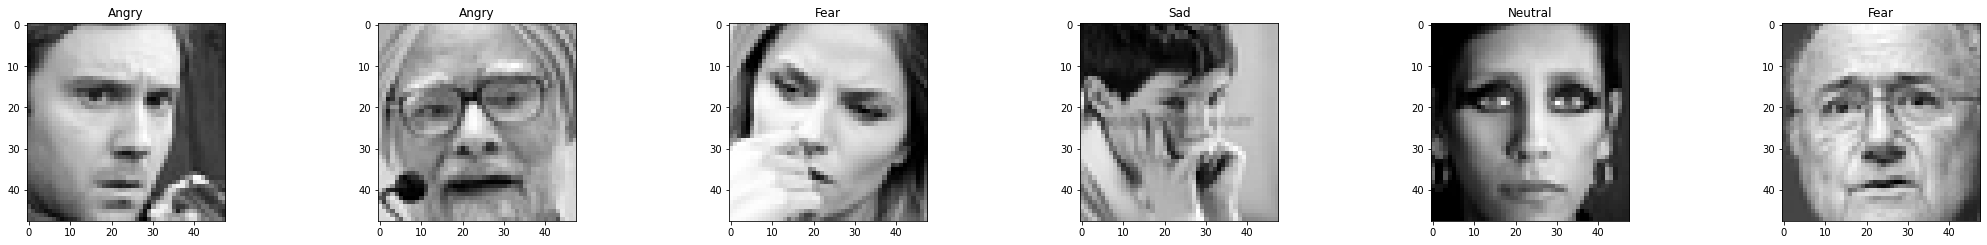

In [9]:
visualize_Img(6)

## 2c: Statistiques des données

### À faire:
1. Calculer quelques statistiques (moyenne, écart-type, etc.) que vous jugez importantes/pertinents sur les données (entrées et/ou sorties)
2. Faire une analyse des résultats et présenter vos conclusions sur ces statistiques.

#### Code

In [11]:
# Load DataSet
df = pd.read_csv('C:/Users/massy/Dev/GTI771-Lab1/data/fer2013.csv')

# Recuperer le training set
df_train = df.loc[df['Usage']=="Training"]

# Recuperer les tests publics
df_public_test = df.loc[df['Usage']=="PublicTest"]

# Recuperer les tests privees
df_private_test = df.loc[df['Usage']=="PrivateTest"]

#(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']


In [12]:
def get_med_df():
    df_list_test = []
    for label in labels:
        index = labels.index(label)
        df_train_1 = df_train.loc[df_train['emotion']== index]
        df_mean = ((df_train_1['pixels'].str.split(' ', expand=True)).apply(pd.to_numeric)).median()
        df_mean_T = pd.DataFrame(data=df_mean).T
#         df_mean_T.insert(0, "emotion", index, True)
        df_list_test.append(df_mean_T)
        
    result = pd.concat(df_list_test)
#     result.drop(columns='emotion')
    result = result.apply(np.int64)
    return result

def get_avg_df():
    df_list_test = []
    for label in labels:
        index = labels.index(label)
        df_train_1 = df_train.loc[df_train['emotion']== index]
        df_mean = ((df_train_1['pixels'].str.split(' ', expand=True)).apply(pd.to_numeric)).mean()
        df_mean_T = pd.DataFrame(data=df_mean).T
        df_mean_T.insert(0, "emotion", index, True)
        df_list_test.append(df_mean_T)

    result = pd.concat(df_list_test)
#     result.drop(columns='emotion')
    result = result.apply(np.int64)
    return result


def visualize_Img(list_q):
    width = 10
    height = 10
    rows = 1
    cols = 8
    axes=[]
    fig=plt.figure(figsize=(20,10))
    for a in range(len(list_q)):
        img = np.array_split(list_q[a], 48)
        axes.append(fig.add_subplot(rows, cols, a+1) )
        subplot_title=(labels[a])
        axes[-1].set_title(subplot_title) 
        plt.imshow(img, cmap='gray')
    fig.tight_layout()    
    plt.show()
    
def visualize_hist(list_q):
    for i in range(7):
        hist, bins = np.histogram(list_q[i], bins=256, range=(0, 256))
        plt.figure()
        plt.title("Class histogram {}".format(i))
        plt.xlabel("Pixel Value")
        plt.ylabel("Number of pixel")
        plt.plot(bins[0:-1],hist)
        plt.show()
        
def visualize_hist_test(list_q):
    width = 10
    height = 5
    rows = 1
    cols = 8
    axes=[]
    fig=plt.figure(figsize=(20,2.5))
    for a in range(7):
        hist, bins = np.histogram(list_q[a], bins=256, range=(0, 256))
        axes.append(fig.add_subplot(rows, cols, a+1) )
        subplot_title=(labels[a])
#         plt.title("Class histogram {}".format(i))
#         plt.xlabel("Pixel Value")
#         plt.ylabel("Number of pixel")
        plt.plot(bins[0:-1],hist)
    fig.tight_layout()    
    plt.show()
    

In [13]:
avg = get_avg_df()
pixel = avg.iloc[:,1:]
avg.head()

,emotion,0,1,2,3,4,5,6,7,8,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0,115,113,111,111,110,109,109,109,111,...,105,105,105,105,105,104,106,107,108,108
0,1,108,104,99,97,97,99,103,106,111,...,115,116,114,114,114,110,108,108,107,108
0,2,131,127,123,120,118,116,113,112,113,...,117,116,115,116,117,117,119,120,120,121
0,3,118,116,113,110,109,107,106,106,107,...,109,108,108,108,108,108,108,109,111,111
0,4,107,106,104,103,102,103,103,104,106,...,103,103,103,103,104,104,104,105,105,105


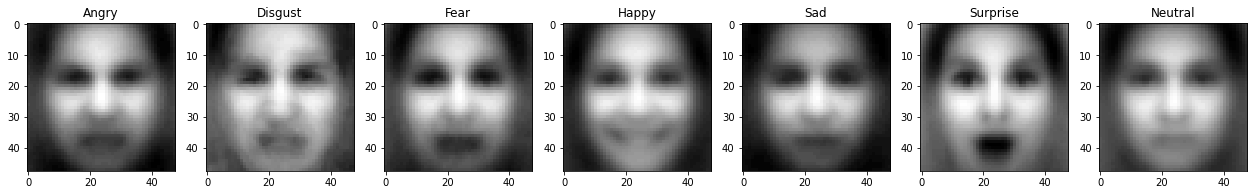

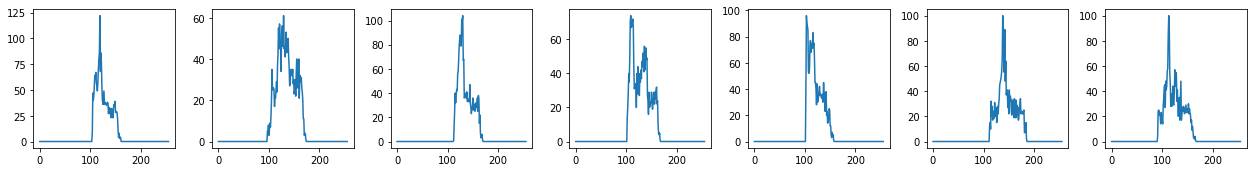

In [14]:
visualize_Img(pixel.to_numpy())
visualize_hist_test(pixel.to_numpy())

In [15]:

# print(avg.iloc[:,1:].to_numpy())

#### Résultats et résponses

In [16]:
# Vos résultats ici
avg.to_csv("average_template_emotions.csv", index = False)

## 2d: Créer et évaluer un modèle de base (baseline)

Un modèle très simple, mais naturel est une ou nous calculons un modèle moyen (template) pour chaque classe (sur les données d'apprentissage) et nous utilisons ces modèles (templates) pour faire des prédictions sur des nouvelles données.

### À faire:
1. Créer un template pour chaque classe
2. Faire un plot de chaque template <font color=black> (visage moyen) </font>
3. Classifier tous les exemples (ensembles d'apprentissage, validation et test) et reporter les résultats:<br>
 3a. taux de classification correct sur les trois (3) ensembles de données<br>
 3b. matrice de confusion pour les résultas sur l'ensemble de test
4. Faire une analyse des résultats et présenter vos conclusions sur ce modèle

#### Code

0.10352154376676304

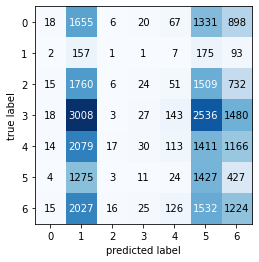

In [17]:
# Votre code de création des modèles
hist = [cv2.calcHist([Xtrain[picture][0]],[0],None,[256],[0,256]) for picture in range(len(Xtrain))] 
#plt.plot(hist[0])
#plt.xlim([0,256])
#plt.show()

pixel_values_avg = pixel.to_numpy()

hist_avg = [cv2.calcHist([pixel_values_avg[picture].astype('uint8')],[0],None,[256],[0,256]) for picture in range(len(pixel_values_avg))] 

#plt.plot(hist_avg[0])
#plt.xlim([0,256])
#plt.show()

def predict_image():
    predicted_images = []
    for i in range(len(Xtrain)):
        predicted_images.append(np.argmin([cv2.compareHist(hist[i], hist_avg[j], cv2.HISTCMP_CHISQR) for j in range(len(pixel_values_avg))]))
    return predicted_images

# confusion_matrix(y_true, y_pred)
plot_confusion_matrix(confusion_matrix(ytrain, predict_image()))

accuracy_score(ytrain, predict_image())
    
#print(ytrain[0])
#plt.imshow(Xtrain[0][0], cmap='gray')

#### Résultats et résponses

In [18]:
# Vos résultats ici

# Partie 3: Extraction de primitives

Vous devez faire une recherche bibliographique pour trouver quelles sont les primitives qui sont plus souvent utilisées pour la reconnaissance des expressions faciales. Voici quelques sources et mot-clés pour guider votre recherche:

- http://www.inf.ufpr.br/lesoliveira/download/ESWA2013.pdf
- https://doi.org/10.1016/j.patrec.2015.06.007 
- https://doi.org/10.1109/FG.2011.5771374
- https://www.hindawi.com/journals/ijbi/2015/267807/


Mots-clés: facial expression recognition, facial emotion recognition.

Bibliothèques Python pour l'extraction de primitives :
* [Scikit-image](https://scikit-image.org/docs/dev/)
* [OpenCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)
* [Scikit-learn](https://scikit-learn.org/stable/modules/feature_extraction.html)

Primitives candidates : 

* LBP, LPQ, Gabor filters, SIFT, SURF, HOG, GLCM, Haralick Moments, etc.

## 3a: Extraire des primitives

### À faire:
1. Choisir au moins deux (2) groupes de primitives et extraire ces primitives des visages (ensembles d'apprentissage, validation et test).
Un groupe de primitives peut être 16 filtres Gabor, un ensemble de Haar-like features ou bien les différentes features de Haralick Texture Features (p. ex. contraste, homogénéité, etc.). Vous devez en sélectionner deux (2) groupes.

Attention! Le résultat des algorithmes d'extraction de primitives doit être des vecteurs de primitives. Il y a des algorithmes qui nécessitent d'une étape additionnelle comme calculer les histogrammes de primitives (p. ex. LBP, SIFT)

2. <font color=black>Sauvegarder vos vecteurs de primitives dans des fichiers '.csv'. Utiliser la même structure du fichier FER3013, où nous avons dans un seul fichier, séquentiellement, les trois partitions: apprentissage (0-28709), validation (28710-32299) et test (32299, 35888). Nommer vos fichiers de primitive en référence à la primitive utilisée. Ex.: lbp83_fer2013.csv </font> 

3. Expliquer et justifier les primitives choisis.

#### Code 

## LBP Feature extraction 

In [19]:
from skimage.feature import local_binary_pattern

In [61]:
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)
Xval = sc.transform(Xval)

### Converting images to lbp features based on a radius of 1 

In [62]:
def img_toLBP(images):
    # settings for LBP
    radius = 1
    n_points = 8 * radius  
    lbp_img = []
    for img in images:
        # Convert img to LBP
        lbp = local_binary_pattern(img.reshape(48,48), n_points, radius)
        lbp_img.append(lbp.reshape(-1))
    
    return lbp_img


Xtrain = Xtrain.reshape(-1, 48*48).astype('uint8')
Xtest = Xtest.reshape(-1, 48*48 ).astype('uint8')
Xval = Xval.reshape(-1, 48*48 ).astype('uint8')
print( Xtrain.shape, Xval.shape, Xtest.shape )
Xtrain_lbp = np.array(img_toLBP(Xtrain))
Xval_lbp = np.array(img_toLBP(Xval))
Xtest_lbp = np.array(img_toLBP(Xtest))

(28709, 2304) (3589, 2304) (3589, 2304)


### Saving as pickle byte data file

In [72]:
import pickle
Lbp = [["Emotion","Pixels","Set"]]
Lbp.extend([[e, p, 'Training'] for e, p in zip(ytrain, Xtrain_lbp)])
Lbp.extend([[e, p, 'PublicTest'] for e, p in zip(yval, Xval_lbp)])
Lbp.extend([[e, p, 'PrivateTest'] for e, p in zip(ytest, Xtest_lbp)])
Lbp = np.array(Lbp)


with open('lbp_features.pickle', 'wb') as file_pi:
    pickle.dump(Lbp, file_pi)
print(Lbp)

[['Emotion' 'Pixels' 'Set']
 [0 array([255., 255., 255., ..., 255., 255., 255.]) 'Training']
 [0 array([255., 255., 255., ...,   0., 255., 255.]) 'Training']
 ...
 [0 array([193., 241., 241., ..., 255., 255., 255.]) 'PrivateTest']
 [3 array([193., 241., 241., ...,  31.,  31.,  28.]) 'PrivateTest']
 [2 array([193., 241., 241., ..., 255.,   1.,  16.]) 'PrivateTest']]


## SURF feature extraction

In [64]:
from skimage import filters

def img_sobel(images):
    # settings for LBP
    sobel_img = []
    for img in images:
        # Convert img to LBP
        sobel = filters.sobel(img.reshape(48,48))
        sobel_img.append(sobel.reshape(-1))
        
    return sobel_img


Xtrain_sobel = np.array(img_sobel(Xtrain))
Xval_sobel = np.array(img_sobel(Xval))
Xtest_sobel = np.array(img_sobel(Xtest))


Sobel = [["Emotion","Pixels","Set"]]
Sobel.extend([[e, p, 'Training'] for e, p in zip(ytrain, Xtrain_sobel)])
Sobel.extend([[e, p, 'PublicTest'] for e, p in zip(yval, Xval_sobel)])
Sobel.extend([[e, p, 'PrivateTest'] for e, p in zip(ytest, Xtest_sobel)])


file_pi = open('sobel_features.pickle', 'wb') 
pickle.dump(Sobel, file_pi)

In [65]:
sobel_imgs = 0
with open(r"sobel_features.pickle", "rb") as input_file:
    sobel_imgs = pickle.load(input_file)
    
print(Xtrain_sobel.shape)


(28709, 2304)


#### Résultats et résponses

## 3b: Analyse visuelle des primitives

##### À faire:
1. Choisir quelques paires de primitives (deux dimensions de votre vecteur de primitives) et tracer un graphique 2D (données d'apprentissage) pour visualiser si ces primitives sont capables de bien séparer les sept (7) classes.
2. Faire une analyse des résultats et présenter vos conclusions sur ces primitives.

#### Code

In [113]:
pca = PCA(n_components=2)

# pixel = df['pixels']

Xtrain_lbp_pca = pca.fit_transform(Xtrain_lbp)
print(Xtrain_lbp_pca.shape)
df1 = pd.DataFrame(data = Lbp[:1000], columns = ["emotion", "pixels", "set"])
df1 = df1.iloc[1:]
df1 = df1.loc[df1["set"] == "Training"] 

(28709, 2)


In [112]:
fig = px.scatter(Xtrain_lbp_pca[:999], x=0, y=1, color=df1['emotion'],title ="PCA")
fig.show()

In [115]:
pca = PCA(n_components=2)

# pixel = df['pixels']

Xtrain_sobel_pca = pca.fit_transform(Xtrain_sobel)
print(Xtrain_sobel_pca.shape)
df1 = pd.DataFrame(data = Sobel[:1000], columns = ["emotion", "pixels", "set"])
df1 = df1.iloc[1:]
df1 = df1.loc[df1["set"] == "Training"] 

(28709, 2)


In [116]:
fig = px.scatter(Xtrain_sobel_pca[:999], x=0, y=1, color=df1['emotion'],title ="PCA")
fig.show()

#### Résultats et résponses

In [ ]:
# Vos résultats ici

# Partie 4: Construction d'un modèle

Nous sommes maintenant prêtes à entraîner un premier modèle avec les primitives extraites dans la Partie 3. On suppose que vous avez deux jeux de primitives (p.ex. LBP et SIFT), alors vous devez entraîner un modèle pour chaque jeu de primitives (2 modèles au total).

## 4a: Entraîner un modèle

Vous devez choisir un des algorithmes d'apprentissage suivants et l'entraîner sur les données d'apprentissage (même algorithme pour les deux jeux de primitives, p.ex. modèle1=DT+LBP et modèle2 = DT+SIFT):<br>
* [Decision trees](https://scikit-learn.org/stable/modules/tree.html) de scikit-learn. <br>
* [k-NN](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification) de scikit-learn. <br>
* [Naïve Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) de scikit-learn. 

Pour ce premier modèle, vous n'est pas supposé de régler (optimiser) votre modèle. Vous allez faire ce réglage dans la Partie (4b). Après l'entraînement, vous devez faire des prédictions sur les données de test.

### À faire:
1. Entraîner un modèle avec l'algorithme d'apprentissage choisi
2. Classifier tous les exemples (ensembles d'apprentissage, validation et test) et reporter les résultats:<br>
 2a. taux de classification correct sur les trois (3) ensembles de données<br>
 2b. matrice de confusion pour l'ensemble de test
3. <font color=blue>Sauvagarder votre modèle dans un fichier. Regarder [model persistence](https://scikitlearn.org/stable/modules/model_persistence.html?highlight=persistence) </font> 
4. Expliquer pourquoi vous avez choisi cet algorithme d'apprentissage (Q1).
5. Faire une analyse des résultats et présenter vos conclusions sur le modèle entraîné (Q2).
6. Concernant vos primitives, sont-elles discriminantes? (Q3)

#### Code

In [127]:
lbp_model = tree.DecisionTreeClassifier(max_depth = 10)
lbp_model = model.fit(Xtrain_lbp, ytrain)


In [131]:
print("Training")
y_train_pred = lbp_model.predict(Xtest_lbp)
print("Model Accuracy: " + accuracy_score(ytrain, y_train_pred))
print("Confusion Matrix")
plot_confusion_matrix(conf_mat=confusion_matrix(ytrain,y_train_pred))
plt.show()
y_valid_pred = lbp_model.predict(Xval_lbp)

Training


ValueError: Found input variables with inconsistent numbers of samples: [28709, 3589]

#### Résultats et résponses

#### Vos résultats ici:

##### Exemple:

| Ensemble | Taux de classification correct |                               
|----------|--------------------------------|
| App      | 99,67%                         |                   
| Val      | 89,77%                         |                             
| Test     | 77,99%                         |        

Q1: Nous avons choisi l'algorithme d'arbre de décision parce que...

Q2: Les taux de classification indiquent que le modèle...

Q3: La performance avec le primitive...

## 4b: Réglage du modèle

Probablement vous avez outperformé le modèle << baseline >>, mais est-ce qu'on peut mieux performer? Est-ce qu'on peut faire un << fine-tuning >> de notre modèle? Quels sont les paramètres que vous pouvez ajuster pour améliorer la performance?

##### À faire:
1. Lister les principaux paramètres de votre modèle qui peuvent aider à améliorer sa performance.
2. Choisir quelques paramètres (au moins 2) et tourner un << grid search>> pour trouver les meilleures valeurs pour ces paramètres.
3. Une fois que vous avez trouvé le meilleur modèle, utiliser ce modèle pour classifier tous les exemples (apprentissage, validation, test) et reporter les résultats:<br>
 3a. taux de classification correct sur les 3 ensembles<br>
 3b. matrice de confusion pour l'ensemble de test
4. Explique pourquoi vous avez choisi ces paramètres.
5. Faire une analyse des résultats et présenter vos conclusions sur ce modèle << fine- tuned >>

#### Code

In [ ]:
# Votre code ici

#### Grid search

In [ ]:
# Votre code ici

#### Résultats et résponses

In [ ]:
# Vos résultats ici:

# Partie 5: Réduction de la dimensionnalité

Bibliotèques Python pour la reduction de la dimensionnalité : 

* [Transformation algorithms](https://scikit-learn.org/stable/modules/decomposition.html#decompositions)
* [Feature selection algorithms](https://scikit-learn.org/stable/modules/feature_selection.html)

## 5a: Réduction de la dimensionnalité

### À faire:
1. Choisir un algorithme de transformation de primitives et un algorithme de sélection des primitives et réduire la dimensionnalité de vos vecteurs de primitives (Partie 3).
2. Choisir les deux meilleures primitives et ploter un graphique ($pc_1$ X $pc_2$ X classe) pour visualiser si ces primitives sont capables de bien séparer les sept (7) classes.
3. Faire une analyse des résultats et présenter vos conclusions sur ces primitives.

#### Code

In [ ]:
# Votre code ici

#### Résultats et résponses

In [ ]:
# Vos résultats ici:

## 5b: Rentraîner le modèle de la partie 4a

Vous devez rentraîner le modèle et l'entraîner sur les données d'apprentissage.<br>
Après l'entraînement, vous devez faire des prédictions sur les données de test.

#### Code

In [ ]:
# Votre code ici

#### Résultats et résponses

In [ ]:
# Vos résultats ici:

## 5c: Réglage du modèle

Vous devez reoptimiser votre nouveau modèle et l'entraîner sur les données d'apprentissage.
Après l'entraînement, vous devez faire des prédictions sur les données de test.

#### Code

In [ ]:
# Votre code ici

#### Résultats et résponses

In [ ]:
# Vos résultats ici

# Partie 6: Analyse qualitative

Choisir dans l'ensemble de test, exemples de visages bien et mal classifié et montrer ces exemples avec la vraie étiquette et la prédiction faite par votre meilleur modèle.

#### Code

In [ ]:
# Vos résultats ici

#### Résultats et résponses

In [ ]:
# Vos résultats ici

<font color=black> 

# Partie 7: Cross-Dataset Challenge

Vous devez tester vos modèles (déjà entraînés et testés sur FER) sur un autre ensemble de données pour eváluer la capacité de géneralisation. 
    
L’ensemble de données à tester est le Jaffe dataset qui contient 213 images de sept (7) expressions faciales pose par 10 modèles féminines japonaises. Chaque image a été étiquetée dans six (6) adjectives d’émotion par 60 sujets japonaises. 

L’ensemble de données originel contient des images 256x256 en niveau de gris, dans le format .tiff, sans compression.

Vous avez les données redimensionnées à 48x48 pixels (`jaffe_48x48.csv`), aussi que les données dans la dimension originelle (`jaffe_256x256.csv`). 
    
* Angry (30 exemples):   Y_test[0:30]   = 0 
* Disgust (29 exemples): Y_test[30:59]  = 1
* Fear (32 exemples): Y_test[59:91]  = 2 
* Happy (31 exemples): Y_test[91:122] = 3 
* Neutral (30 exemples): Y_test[122:152]= 6 
* Surprise (31 exemples): Y_test[152:183]= 5 
* Sad (30 exemples): Y_test[183:213]= 4 

</font> 

<font color=black> 
    
## 7a: Charger le fichier de données de test
</font>

In [ ]:
import numpy as np

# Read from file
X_test_jaffe = np.loadtxt('jaffe_48x48.csv', delimiter=',', dtype=int)
#X_test_jaffe = np.loadtxt('jaffe_256x256.csv', delimiter=',', dtype=int)
y_test_jaffe = np.loadtxt('jaffe_labels.csv', delimiter=',', dtype=int)

# reshape to be [samples][pixels][width][height]
X_test_jaffe  = X_test_jaffe.reshape(X_test_jaffe.shape[0], 1, 48, 48).astype('uint8')
#X_test_jaffe  = X_test_jaffe.reshape(X_test_jaffe.shape[0], 1, 256, 256).astype('uint8')

X_test_jaffe.dtype

<font color=black>
    
## 7b: Visualisation des visages de Jaffe
</font>

In [ ]:
import matplotlib.pyplot as plt
def getLabel(id):
    return ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'][id]
plt.figure(figsize=(10, 10))
j = 0
for i in [5, 40, 70, 105, 135, 171, 191]:
    plt.subplot(330 + 1 + j)
    plt.imshow(np.squeeze(X_test_jaffe[i], axis=0),cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('Label = %s' % getLabel(y_test_jaffe[i]), fontsize = 12)
    j = j + 1
plt.show()

<font color=black> 
    
### À faire:
1. Tester vos modèles sur les 213 images de Jaffe dataset.
2. Faire une analyse des résultats et présenter vos conclusions sur la capacité de generalisation de vos modèles.
</font>

#### Code

In [ ]:
# Votre code ici

#### Résultats et résponses

In [ ]:
# Vos résultats ici

## Partie Final: Conclusion

### À faire:
1. Résumer et comparer les principaux résultats .
2. Faire une analyse des résultats obtenus et présenter vos conclusions sur les différents modèles que vous avez entraînés.

#### Résultats et résponses

In [ ]:
# Vos résultats ici: